## Ejercicio Práctico - Clase 3 VPC2 - 4Co2021

1) Realizar transfer learning a partir de alguna de las siguientes redes: vgg11, resnet18, convnext_tiny preentrenadas, y entrenar sobre el dataset CIFAR10 contenido en PyTorch. Que puede concluir al compararlos con los resultados obtenidos en el entrenamiento de la tarea 2?

2) Realice el entrenamiento de la misma red seleccionada en el punto 1, sin partir de pesos preentrenados en esta oportunidad y sin congelar capas. A que resultados llega y como los explica?


In [ ]:
!nvidia-smi

Sat Jun 11 13:42:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchsummary

!pip install torchmetrics
import torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 5.7 MB/s 


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
### Descripción del conjunto de entrenamiento ###
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
### Dimensiones de un ejemplo del dataset ###
(32, 32, 3)
### Descripción del conjunto de evaluación ###
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
Label de la imágen 0: frog
Label de la imágen 1: truck
Label de la imágen 2: truck
Label de la imágen 3: deer
Label de la imágen 4: automobile
Label de la imágen 5: automobile
Label de la imágen 6: bird
Label de la imágen 7: horse
Label de la imágen 8: ship


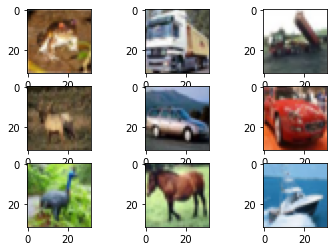

In [ ]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

idx_to_class = {v: k for k, v in train_set.class_to_idx.items()}


print("### Descripción del conjunto de entrenamiento ###")
print(train_set)
print("### Dimensiones de un ejemplo del dataset ###")
print(np.shape(train_set[0][0]))
print("### Descripción del conjunto de evaluación ###")
print(test_set)

# Ploteo algunas imagenes del dataset y sus etiquetas
for i in range(9):
  image, label = train_set[i]
  plt.subplot(331 + i)
  plt.imshow(image)
  print("Label de la imágen {}: {}".format(i, idx_to_class[label]))

plt.show()

In [ ]:
data_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                  torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transforms)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=data_transforms)


valid_set_size = 5000
train_set, valid_set = torch.utils.data.random_split(train_set, [len(train_set) - valid_set_size, valid_set_size])

print("Tamaño del conjunto de entrenamiento: {}".format(len(train_set)))
print("Tamaño del conjunto de validación: {}".format(len(valid_set)))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=True)



Files already downloaded and verified
Files already downloaded and verified
Tamaño del conjunto de entrenamiento: 45000
Tamaño del conjunto de validación: 5000


In [ ]:
resnet18_model = torchvision.models.resnet18(pretrained=True)

resnet18_model.to("cuda")

torchsummary.summary(resnet18_model, input_size=(3, 32, 32))
resnet18_model.modules

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

<bound method Module.modules of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

 ## Entrenar solo ultima capa

In [ ]:
for param in resnet18_model.parameters():
    param.requires_grad = False

In [ ]:
last_layer_in_features = resnet18_model.fc.in_features
print(last_layer_in_features)
resnet18_model.fc = torch.nn.Linear(in_features=last_layer_in_features, out_features=10)

512


In [ ]:
optimizer_ft = torch.optim.Adam(resnet18_model.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
def train(model, criterion, optimizer, train_loader, valid_loader, epochs):

    accuracy_metric = torchmetrics.Accuracy()

    if torch.cuda.is_available():
        model.to("cuda")
        accuracy_metric.to("cuda")

    train_loss = []
    train_acc = []
    valid_loss = []
    valid_acc = []

    for epoch in range(epochs):

        # Pongo el modelo en modo entrenamiento
        model.train()

        epoch_train_loss = 0.0
        epoch_train_accuracy = 0.0

        for train_data, train_target in train_loader:
            
            if torch.cuda.is_available():
                train_data = train_data.to("cuda")
                train_target = train_target.to("cuda")

            optimizer.zero_grad()
            output = model(train_data)
            loss = criterion(output, train_target)
            epoch_train_loss += loss.item()
            loss.backward()
            optimizer.step()

            accuracy = accuracy_metric(output, train_target)
            epoch_train_accuracy += accuracy.item()

        epoch_train_loss = epoch_train_loss / len(train_loader)
        epoch_train_accuracy = epoch_train_accuracy / len(train_loader)
        train_loss.append(epoch_train_loss)
        train_acc.append(epoch_train_accuracy)

        # Pongo el modelo en modo testeo
        model.eval()

        epoch_valid_loss = 0.0
        epoch_valid_accuracy = 0.0

        for valid_data, valid_target in valid_loader:
            if torch.cuda.is_available():
                valid_data = valid_data.to("cuda")
                valid_target = valid_target.to("cuda")

            output = model(valid_data)
            epoch_valid_loss += criterion(output, valid_target).item()
            epoch_valid_accuracy += accuracy_metric(output, valid_target).item()
            
        epoch_valid_loss = epoch_valid_loss / len(valid_loader)
        epoch_valid_accuracy = epoch_valid_accuracy / len(valid_loader)
        valid_loss.append(epoch_valid_loss)
        valid_acc.append(epoch_valid_accuracy)

        print("Epoch: {}/{} - Train loss {:.6f} - Train Accuracy {:.6f} - Valid Loss {:.6f} - Valid Accuracy {:.6f}".format(
        epoch+1, epochs, epoch_train_loss, epoch_train_accuracy, epoch_valid_loss, epoch_valid_accuracy))

    history = {}
    history["train_loss"] = train_loss
    history["train_acc"] = train_acc
    history["valid_loss"] = valid_loss
    history["valid_acc"] = valid_acc

    return model, history

In [ ]:
result_model, history = train(resnet18_model, criterion, optimizer_ft, train_loader, valid_loader, 20)

Epoch: 1/20 - Train loss 1.024633 - Train Accuracy 0.647344 - Valid Loss 0.669650 - Valid Accuracy 0.774084
Epoch: 2/20 - Train loss 0.643347 - Train Accuracy 0.780673 - Valid Loss 0.578806 - Valid Accuracy 0.798169
Epoch: 3/20 - Train loss 0.489659 - Train Accuracy 0.831468 - Valid Loss 0.539222 - Valid Accuracy 0.818869
Epoch: 4/20 - Train loss 0.378602 - Train Accuracy 0.869336 - Valid Loss 0.535620 - Valid Accuracy 0.823447
Epoch: 5/20 - Train loss 0.293259 - Train Accuracy 0.897766 - Valid Loss 0.547026 - Valid Accuracy 0.819666
Epoch: 6/20 - Train loss 0.228285 - Train Accuracy 0.920598 - Valid Loss 0.602985 - Valid Accuracy 0.823447
Epoch: 7/20 - Train loss 0.178946 - Train Accuracy 0.938633 - Valid Loss 0.595138 - Valid Accuracy 0.824045
Epoch: 8/20 - Train loss 0.150926 - Train Accuracy 0.948028 - Valid Loss 0.645453 - Valid Accuracy 0.815287
Epoch: 9/20 - Train loss 0.122625 - Train Accuracy 0.957934 - Valid Loss 0.643208 - Valid Accuracy 0.833002
Epoch: 10/20 - Train loss 0.

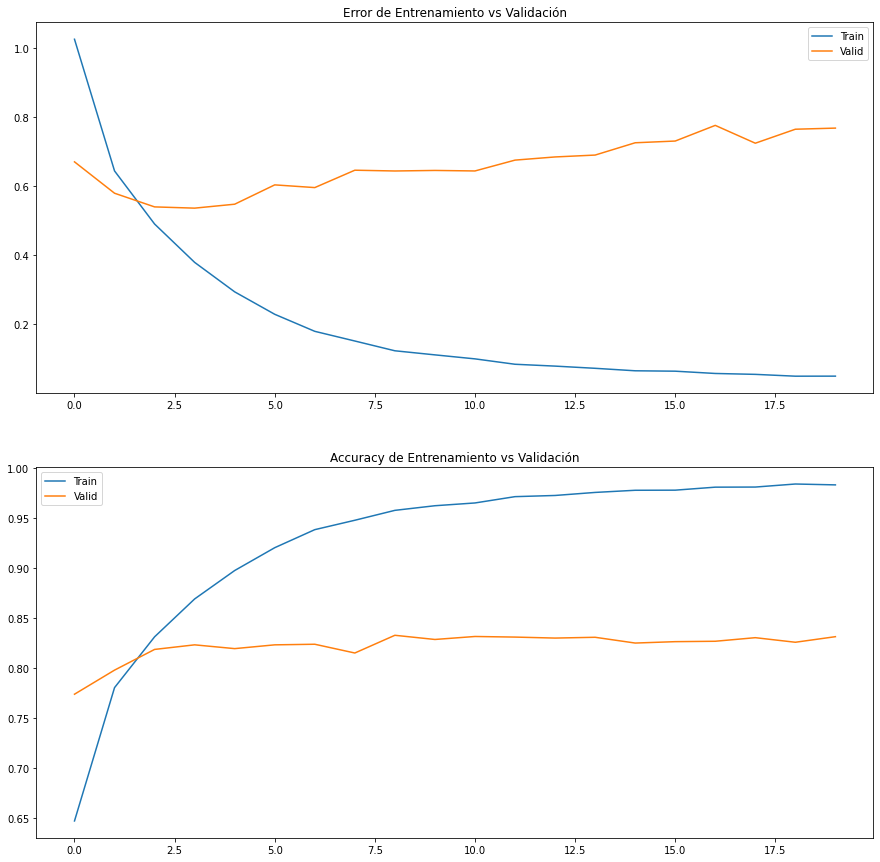

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history["train_loss"]) 
axs[0].plot(history["valid_loss"]) 
axs[0].title.set_text('Error de Entrenamiento vs Validación') 
axs[0].legend(['Train', 'Valid'])  

axs[1].plot(history["train_acc"]) 
axs[1].plot(history["valid_acc"]) 
axs[1].title.set_text('Accuracy de Entrenamiento vs Validación') 
axs[1].legend(['Train', 'Valid'])

In [ ]:
# Realizo el paso de evaluación computando error y accuracy
test_loss = 0.0
test_accuracy = 0.0

accuracy_metric = torchmetrics.Accuracy()
if torch.cuda.is_available():
  accuracy_metric.to("cuda")

for test_data, test_target in test_loader:
  if torch.cuda.is_available():
        test_data, test_target = test_data.cuda(), test_target.cuda()
  output = resnet18_model(test_data)
  test_loss += criterion(output, test_target).item()
  test_accuracy += accuracy_metric(output, test_target).item()

test_loss = test_loss / len(test_loader)
test_accuracy = test_accuracy / len(test_loader)

print("El modelo logro un error de {:.6f} y una accuracy de {:.6f}".format(test_loss, test_accuracy))

El modelo logro un error de 0.780682 y una accuracy de 0.830072


1. Realizar transfer learning a partir de alguna de las siguientes redes: vgg11, resnet18, convnext_tiny preentrenadas, y entrenar sobre el dataset CIFAR10 contenido en PyTorch. Que puede concluir al compararlos con los resultados obtenidos en el entrenamiento de la tarea 2?

  Usando el modelo preentrenado resnet18 logramos alcanzar con solo 20 epochs un accuracy de entrenamiento del 98% y en validación de 83% que es mejor a lo obtenido en la tarea 2 (en el que se corrió 120 epochs y no se alcanzó ese accuracy). Podemos decir que nos toma menos tiempo de entrenamiento una red preentrenada en comparación a una red entrenada desde cero.

## Entrenar todo la red

In [ ]:
resnet18_model = torchvision.models.resnet18(pretrained=False)

resnet18_model.to("cuda")

torchsummary.summary(resnet18_model, input_size=(3, 32, 32))
resnet18_model.modules

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

<bound method Module.modules of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [ ]:
for param in resnet18_model.parameters():
    param.requires_grad = True


last_layer_in_features = resnet18_model.fc.in_features
print(last_layer_in_features)
resnet18_model.fc = torch.nn.Linear(in_features=last_layer_in_features, out_features=10)

512


In [ ]:
optimizer_ft = torch.optim.Adam(resnet18_model.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
result_model, history = train(resnet18_model, criterion, optimizer_ft, train_loader, valid_loader, 20)

Epoch: 1/20 - Train loss 1.543880 - Train Accuracy 0.444274 - Valid Loss 1.252502 - Valid Accuracy 0.547970
Epoch: 2/20 - Train loss 1.170261 - Train Accuracy 0.583600 - Valid Loss 1.066673 - Valid Accuracy 0.617436
Epoch: 3/20 - Train loss 0.969764 - Train Accuracy 0.656872 - Valid Loss 1.042673 - Valid Accuracy 0.621218
Epoch: 4/20 - Train loss 0.809233 - Train Accuracy 0.715441 - Valid Loss 0.984378 - Valid Accuracy 0.662818
Epoch: 5/20 - Train loss 0.660799 - Train Accuracy 0.766813 - Valid Loss 0.972320 - Valid Accuracy 0.664610
Epoch: 6/20 - Train loss 0.524819 - Train Accuracy 0.815498 - Valid Loss 0.988944 - Valid Accuracy 0.677946
Epoch: 7/20 - Train loss 0.413004 - Train Accuracy 0.854500 - Valid Loss 1.056609 - Valid Accuracy 0.670382
Epoch: 8/20 - Train loss 0.321412 - Train Accuracy 0.886749 - Valid Loss 1.189780 - Valid Accuracy 0.663615
Epoch: 9/20 - Train loss 0.265428 - Train Accuracy 0.905939 - Valid Loss 1.190751 - Valid Accuracy 0.677946
Epoch: 10/20 - Train loss 0.

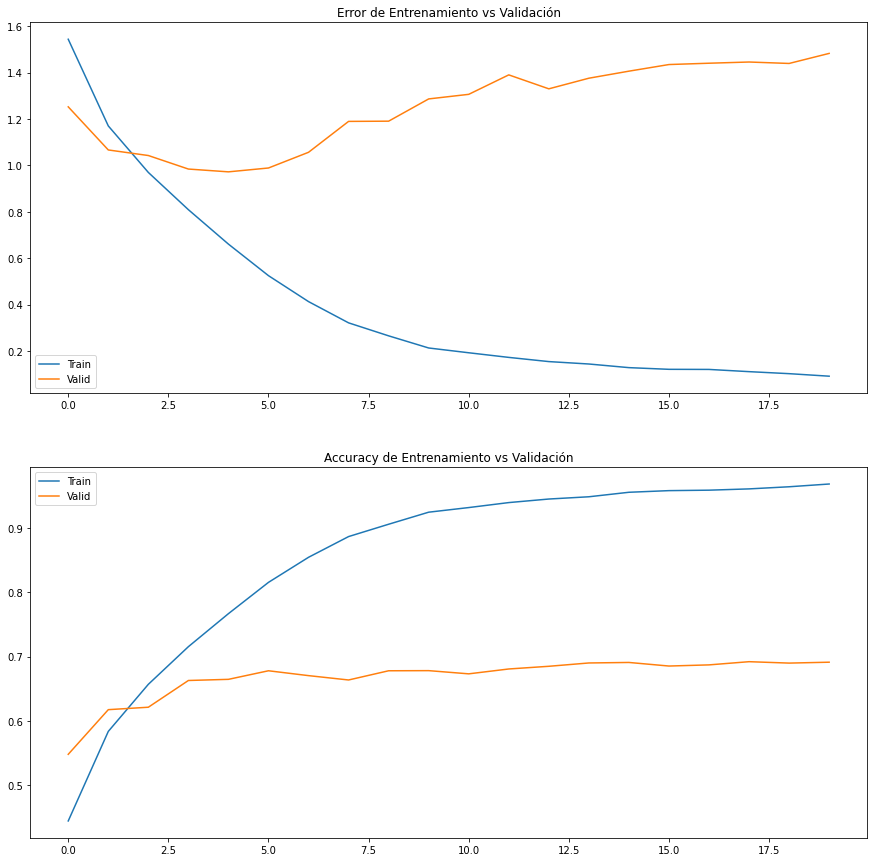

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history["train_loss"]) 
axs[0].plot(history["valid_loss"]) 
axs[0].title.set_text('Error de Entrenamiento vs Validación') 
axs[0].legend(['Train', 'Valid'])  

axs[1].plot(history["train_acc"]) 
axs[1].plot(history["valid_acc"]) 
axs[1].title.set_text('Accuracy de Entrenamiento vs Validación') 
axs[1].legend(['Train', 'Valid'])

In [ ]:
# Realizo el paso de evaluación computando error y accuracy
test_loss = 0.0
test_accuracy = 0.0

accuracy_metric = torchmetrics.Accuracy()
if torch.cuda.is_available():
  accuracy_metric.to("cuda")

for test_data, test_target in test_loader:
  if torch.cuda.is_available():
        test_data, test_target = test_data.cuda(), test_target.cuda()
  output = resnet18_model(test_data)
  test_loss += criterion(output, test_target).item()
  test_accuracy += accuracy_metric(output, test_target).item()

test_loss = test_loss / len(test_loader)
test_accuracy = test_accuracy / len(test_loader)

print("El modelo logro un error de {:.6f} y una accuracy de {:.6f}".format(test_loss, test_accuracy))

El modelo logro un error de 1.540251 y una accuracy de 0.681709


2. Realice el entrenamiento de la misma red seleccionada en el punto 1, sin partir de pesos preentrenados en esta oportunidad y sin congelar capas. A que resultados llega y como los explica?

  Entrenando toda la red resnet18 desde cero logramos obtener un bajo valor de accuracy en validación, además que se observa un mayor sobre-entrenamiento. Esto se puede explicar debido a que no se tiene la cantidad suficiente de datos para generalizar la red, se podría probar con data augmentation pero nos tomaría mayor tiempo de entrenamiento como vimos en la tarea 2.